In [1]:
from collections import Counter

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

Counter({0: 9900, 1: 100})

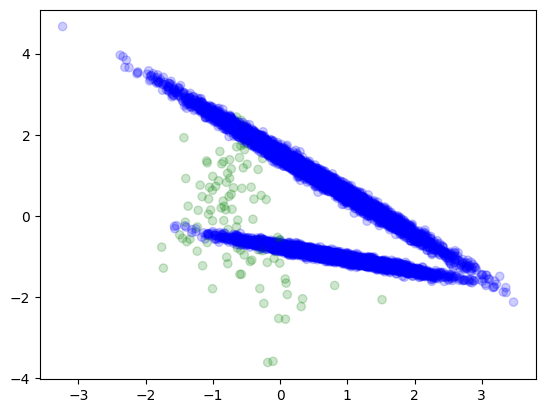

In [2]:
## 10,000개의 샘플을 만드는데 99%가 레이블이 0이고, 1%가 레이블인 1인 데이터 셋
x, y = make_classification(n_samples = 10000, n_features = 5,
                           weights = [0.99], flip_y = 0)
c    = ['blue' if lb == 0 else 'green' for lb in y]
plt.scatter(x[: , 1], x[: , 2], c = c, alpha = 0.2)
Counter(y)

Counter({0: 100, 1: 100})

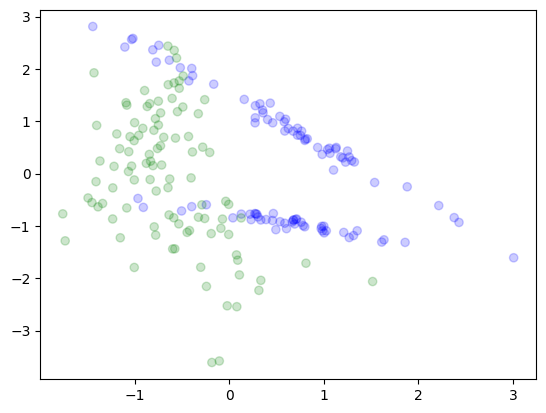

In [3]:
## 1. 언더 샘플링 (Under Sampling)
## majority의 샘플을 줄이는 방법
## 다수 집단의 중요한 feature가 손실 될 수 있음.

undersampler     = RandomUnderSampler(sampling_strategy = 'majority')
under_x, under_y = undersampler.fit_resample(x, y)

c = ['blue' if lb == 0 else 'green' for lb in under_y]
plt.scatter(under_x[:, 1], under_x[:, 2], c = c, alpha = 0.2)
Counter(under_y)

Counter({0: 250, 1: 100})

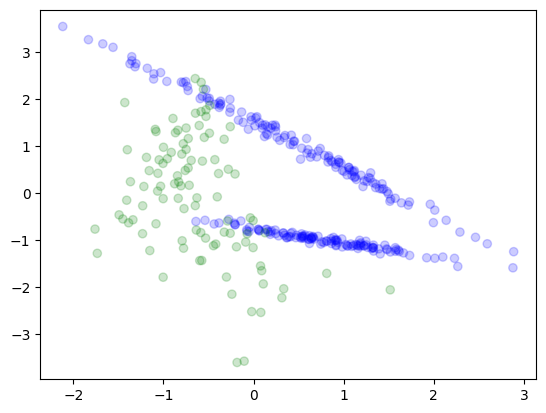

In [4]:
## sampling_strategy 파라미터에 0 ~ 1사이의 값을 넣으면,
## (# of minority / # of majority)가 되도록 majority를 수행함.
undersampler     = RandomUnderSampler(sampling_strategy = 0.4)
under_x, under_y = undersampler.fit_resample(x, y)

c = ['blue' if lb == 0 else 'green' for lb in under_y]
plt.scatter(under_x[:, 1], under_x[:, 2], c = c, alpha = 0.2)
Counter(under_y)

Counter({0: 9900, 1: 9900})

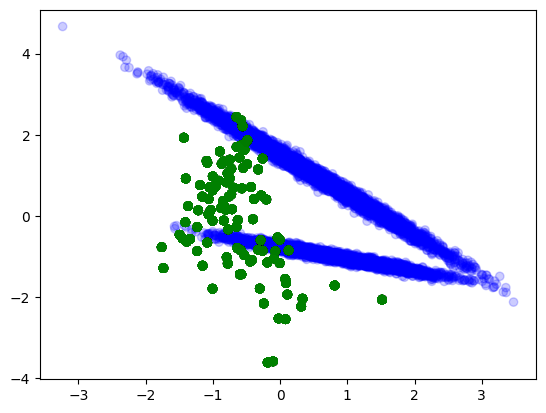

In [5]:
## 2. 오버 샘플링 (Over Sampling)
## minority의 샘플 수를 늘려 불균형을 해소하는 방법
## 동일한 샘플이 여러번 학습 데이터에 포함되는 경우가 생겨, 과적합이 발생할 수 있음.
oversampler    = RandomOverSampler(sampling_strategy = 'minority')
over_x, over_y = oversampler.fit_resample(x, y)

c = ['blue' if lb == 0 else 'green' for lb in over_y]
plt.scatter(over_x[:, 1], over_x[:, 2], c = c, alpha = 0.2)
Counter(over_y)

Counter({0: 9900, 1: 3960})

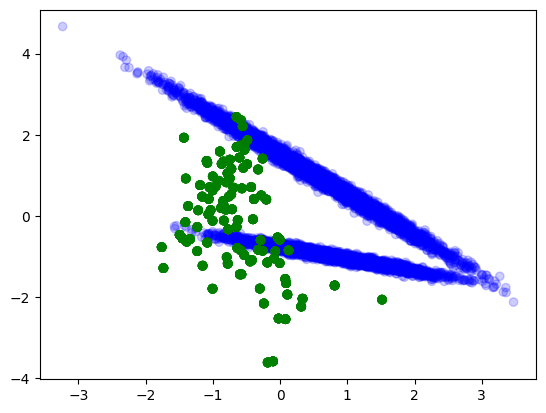

In [7]:
## 언더 샘플링과 동일하게 sampling_strategy 파라미터에 0 ~ 1사이의 값을 입력하면,
## (# of minority / # of majority)가 되도록 샘플링 한다.
oversampler    = RandomOverSampler(sampling_strategy = 0.4)
over_x, over_y = oversampler.fit_resample(x, y)

c = ['blue' if lb == 0 else 'green' for lb in over_y]
plt.scatter(over_x[:, 1], over_x[:, 2], c = c, alpha = 0.2)
Counter(over_y)